In [0]:
from geopy.geocoders import Nominatim
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO
import time
from matplotlib.patches import Polygon
import pandas as pd


In [0]:
def find_geolocation():
    
    addressToBeFound = 'Delhi Technological University'
    license_key = 'dg3o6k2275i9a7aur6fqcovced4tiauu'

    mapApiUrl = 'https://apis.mapmyindia.com/advancedmaps/v1/'+ licence_key +'/geocode?address' + addressToBeFound
    headers = {'Authorization': '9K_q_9Q2GHNXFW0aL3uh7xzlj1Nljm8gIYA8xrPuOfyqOTwpyp3peJd6JNTun_DZo7PyetVk5s360Rljly8K5OymV2bFNPAWGn75wdkUc-0='}
    params = {}
    response = requests.post(analyze_url, headers=headers,
                                params=params)
    response.raise_for_status()
    lat = response.lat
    lon = response.lon

    return

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode("DCE, New Delhi, India")
loc_lat = location.latitude
loc_lon = location.longitude

location = locator.geocode("Delhi College of Engineering, New Delhi, India")
#print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))
img_lat = location.latitude
img_lon = location.longitude

from datetime import datetime
from datetime import date

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

now = now.replace(hour=8, minute=0, second=0, microsecond=0)
image_time = now.strftime("%H:%M:%S")
print("Image Time =", image_time)

date_curr=date.today()
date_img="2019-12-18"

method_type = 'report'  #add_place


def check_valid_time(current_time, image_time):
  hr_curr=int(current_time[0:2],10)
  min_curr=int(current_time[3:5],10)

  hr_img=int(image_time[0:2],10)
  min_img=int(image_time[3:5],10)

  if hr_curr-hr_img==0:
    if min_curr-min_img < 5:
      return True
  elif hr_curr-hr_img==0:
    if 60-min_curr+min_img < 5:
      return True

  return True


def check_valid_date(date_curr, date_img):
  
  return True


def check_valic_loc(loc_lat, loc_lon, img_lat, img_lon):
  
  return int(loc_lat)==int(img_lat) and int(loc_lon)==int(img_lon)

Current Time = 05:18:07
Image Time = 08:00:00


In [0]:
class User:
  
  def __init__(self, user_id, recent_issues_reported, rating):
    self.user_id=user_id
    self.recent_issues_reported = recent_issues_reported
    self.rating = rating


In [0]:
def report_request(analyze_url, image_url):

    headers = {'Ocp-Apim-Subscription-Key': 'fed7fcebf7ac4177acb3953269afed28'}
    params = {'visualFeatures': 'Tags,Categories,Description,Color'}
    data = {'url': image_url}
    response = requests.post(analyze_url, headers=headers,
                            params=params, json=data)
    response.raise_for_status()

    # The 'analysis' object contains various fields that describe the image. The most
    # relevant caption for the image is obtained from the 'description' property.
    analysis = response.json()
    #print(json.dumps(response.json()))
    image_caption = analysis["description"]["captions"][0]["text"].capitalize()

    # # Display the image and overlay it with the caption.
    # image = Image.open(BytesIO(requests.get(image_url).content))
    # plt.imshow(image)
    # plt.axis("off")
    # _ = plt.title(image_caption, size="x-large", y=-0.1)
    # plt.show()

    for i in range(10):
      if analysis['tags'][i]['name']=='traffic':
        return analysis['tags'][i]['confidence']

    return NULL

  #print(report_request(analyze_url, image_url))


In [0]:
def add_loc_request(text_recognition_url, image_url):

      headers = {'Ocp-Apim-Subscription-Key': 'fed7fcebf7ac4177acb3953269afed28'}
      data = {'url': image_url}
      response = requests.post(
          text_recognition_url, headers=headers, json=data)
      response.raise_for_status()

      # Extracting text requires two API calls: One call to submit the
      # image for processing, the other to retrieve the text found in the image.

      # Holds the URI used to retrieve the recognized text.
      operation_url = response.headers["Operation-Location"]

      # The recognized text isn't immediately available, so poll to wait for completion.
      analysis = {}
      poll = True
      while (poll):
          response_final = requests.get(
              response.headers["Operation-Location"], headers=headers)
          analysis = response_final.json()
          #print(analysis)
          time.sleep(1)
          if ("recognitionResults" in analysis):
              poll = False
          if ("status" in analysis and analysis['status'] == 'Failed'):
              poll = False

      brand=analysis['recognitionResults'][0]['lines'][0]['text']

      # polygons = []
      # if ("recognitionResults" in analysis):
      #     # Extract the recognized text, with bounding boxes.
      #     polygons = [(line["boundingBox"], line["text"])
      #                 for line in analysis["recognitionResults"][0]["lines"]]


      df=pd.read_csv('brands.csv')

      for i in range(len(df)):
        if df['Name'][i].lower()==brand.lower():
          return brand

      return null

    #print(add_loc_request(text_recognition_url, image_url))

In [0]:
def generate_image_description(analyze_url, image_url):

    headers = {'Ocp-Apim-Subscription-Key': 'fed7fcebf7ac4177acb3953269afed28'}
    params = {'maxCandidates': '1', 'language':'en'}
    data = {'url': image_url}
    response = requests.post(analyze_url, headers=headers,
                            params=params, json=data)
    response.raise_for_status()

    # The 'analysis' object contains various fields that describe the image. The most
    # relevant caption for the image is obtained from the 'description' property.
    analysis = response.json()
    #print(json.dumps(response.json()))
    image_caption = analysis["description"]["captions"][0]["text"]
    #print(image_caption)

    return image_caption


In [0]:
analyze_url_in="https://atlas.microsoft.com/traffic/incident/tile/png?subscription-key=fed7fcebf7ac4177acb3953269afed28&api-version=1.0&style=night&zoom=10&x=175&y=408"
image_url_in = "https://www.geotab.com/geoimages/blog/traffic-congestion-prediction.png"

def generate_incident_title(analyze_url_in, image_url_in):

    params = {'maxCandidates': '1', 'language':'en_2'}
    data = {'url': image_url_in}

    #response = requests.post(analyze_url_in,params=params, json=data)
    #response.raise_for_status()

    # The 'analysis' object contains various fields that describe the image. The most
    # relevant caption for the image is obtained from the 'description' property.
    #analysis = response.json()
    #print(json.dumps(response.json()))

    return incident_tile

In [0]:
"""
#Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))

ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
"""
incident_tile=0.9

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import gensim
#load word2vec model, here GoogleNews is used
model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = stopwords.words('english')

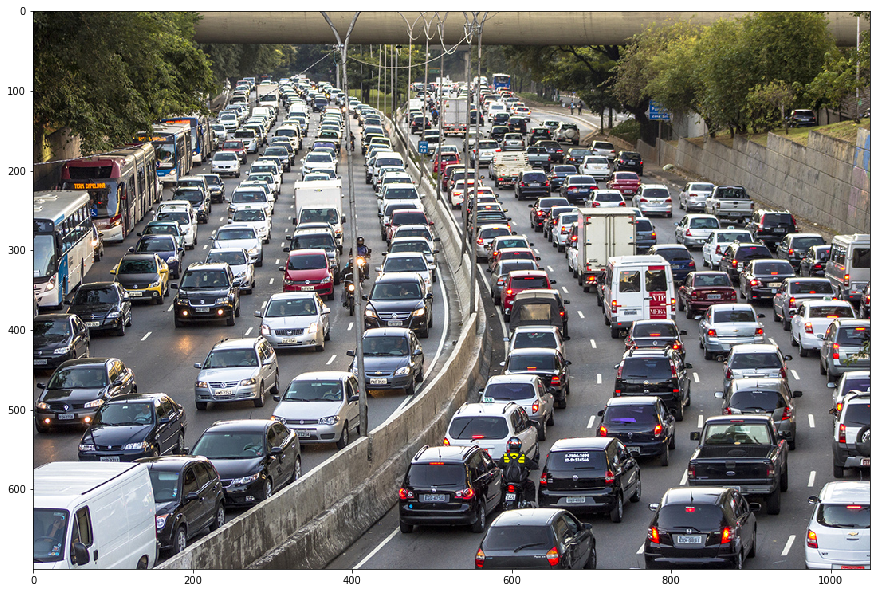

In [0]:
analyze_url_descrip = "https://centralindia.api.cognitive.microsoft.com/vision/v2.0/describe"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg"
#image_url ="https://cdn.dnaindia.com/sites/default/files/styles/full/public/2016/10/07/508321-roads7.jpg"
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)


In [0]:
user_descrip="heavy traffic on road"

def similarity(img_descrip, user_descrip):

  #stop word removal  
  stop_words = set(stopwords.words('english')) 
    
  word_tokens_img = word_tokenize(img_descrip) 
  word_tokens_user = word_tokenize(user_descrip) 
    
  filtered_sentence_img = [w for w in word_tokens_img if not w in stop_words] 
  filtered_sentence_user = [w for w in word_tokens_user if not w in stop_words] 
    
  filtered_sentence_img = ""
  filtered_sentence_user = ""  
    
  for w in word_tokens_img: 
      if w not in stop_words: 
          filtered_sentence_img=filtered_sentence_img+" "+w+"" 

  for w in word_tokens_user: 
      if w not in stop_words: 
          filtered_sentence_user=filtered_sentence_user+" "+w+""
          
  #calculate distance between two sentences using WMD algorithm
  distance = model.wv.n_similarity(filtered_sentence_img.lower().split(), filtered_sentence_user.lower().split())
  print ('similarity = %.3f' % distance)

  return distance

In [0]:
u1= User("u1", 0, 0)
u2= User("u2", 0, 0)
u3= User("u3", 0, 0)
u4= User("u4", 0, 0)
u5= User("u5", 0, 0)

In [0]:
# 1. IMAGE ONLY: Confidence on the basis of image only
# 2. IMAGE AND TEXT: Similarity between text generated for image by Azure and user entered content
# 3. TEXT ONLY: Similarity between Traffic Incident detail generated by Azure and user entered content 

In [0]:
analyze_url = "https://centralindia.api.cognitive.microsoft.com/vision/v2.1/analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg"

img_only=report_request(analyze_url,image_url)

'FOREVER 21'

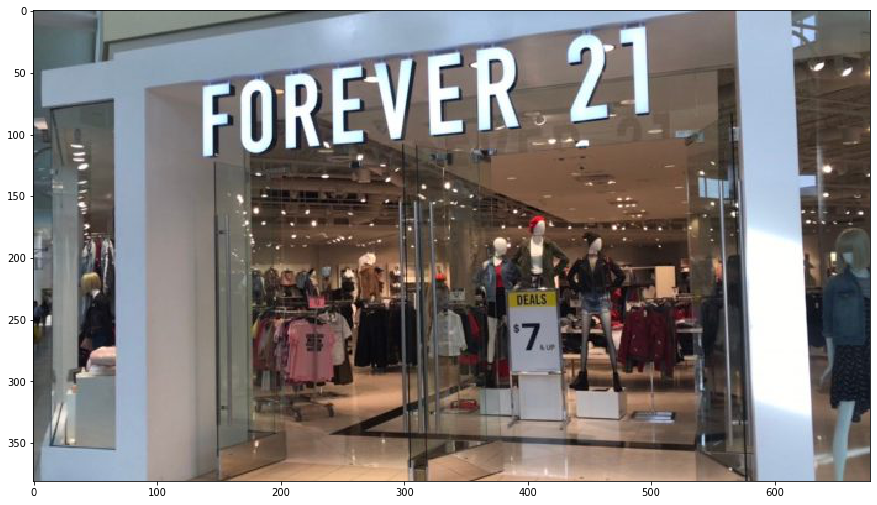

In [0]:
text_recognition_url = "https://centralindia.api.cognitive.microsoft.com/vision/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url2 = "https://thestatetimes.com/wp-content/uploads/2019/09/ff9d5c25-c0c0-47b0-8de5-9665c2217a97-forever21-678x381.jpg"

import io
import requests
from PIL import Image
r = requests.get(image_url2, stream=True)
aux_im = Image.open(io.BytesIO(r.content))
plt.figure(figsize=(15, 15))
ax = plt.imshow(aux_im)

add_loc_request(text_recognition_url, image_url2)

In [0]:
import numpy as np

In [116]:
method_type='report'

if method_type=='report':
  report_valid_boolean = check_valid_time(current_time, image_time) and check_valid_date(date_curr, date_img)
  #print(check_valid_time(current_time, image_time) and check_valid_date(date_curr, date_img))
  
  if report_valid_boolean:
    img_only=report_request(analyze_url, image_url)
    print(img_only)
    img_descrip=generate_image_description(analyze_url_descrip,image_url)
    dist=similarity(img_descrip, user_descrip)
    incident_tile=generate_incident_title(analyze_url_in, image_url_in)
    rms = np.sqrt((img_only*img_only + dist*dist + incident_tile*incident_tile)/3)
    u1.rating+=rms
    u1.recent_issues_reported+=1
    print("Updated Rating of User 1: ", u1.rating)
    print("Issues Correctly reported by user 1: ",u1.recent_issues_reported)

elif method_type=='add_place':
  add_loc_valid_boolean = check_valid_time(current_time, image_time) and check_valid_date(date_curr, date_img) and check_valic_loc(loc_lat, loc_lon, img_lat, img_lon)
  
  if add_loc_valid_boolean:
    add_loc_request(text_recognition_url, image_url2)
    print(add_loc_request(text_recognition_url, image_url2))
else:
  print('Wrong Method Type')

0.9924004077911377
similarity = 0.714
Updated Rating of User 1:  0.8765862925537369
Issues Correctly reported by user 1:  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
